## Importing and prepping data

In [1]:
import pandas as pd
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.pca as pca

In [2]:
features = []
remote_folder = 'Gel_Studies/11_21_18_coverage' #Folder in AWS S3 containing files to be analyzed
bucket = 'ccurtis.data'
vids = 20
gels = ['PSCOOH', 'p0_1', 'p0_2', 'p0_4', 'p0_5', 'p0_6', 'p0_75', 'p1']
nonnum = ['Excess', 'Well', 'Video Number', 'Track_ID', 'Mean Mean_Intensity', 'Std Mean_Intensity', 'X', 'Y',
          'Mean X', 'Mean Y', 'Std X', 'Std Y']
featofvar = 'Excess'

counter = 0
for gel in gels:
    for num in range(1, vids+1):
        try:
            filename = 'features_{}_XY{}.csv'.format(gel, '%02d' % num)
            aws.download_s3('{}/{}'.format(remote_folder, filename), filename, bucket_name='ccurtis.data')
            fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
            print('{} size: {}'.format(filename, fstats.shape))
            fstats['Excess'] = pd.Series(fstats.shape[0]*[gel], index=fstats.index)
            fstats['Video Number'] = pd.Series(fstats.shape[0]*[num], index=fstats.index)
            if num < 11:
                fstats['Well'] = pd.Series(fstats.shape[0]*[1], index=fstats.index)
            else:
                fstats['Well'] = pd.Series(fstats.shape[0]*[2], index=fstats.index)
            counter = counter + 1
            if counter == 1:
                fstats_tot = fstats
            else:
                fstats_tot = fstats_tot.append(fstats, ignore_index=True)
        except:
            print('skip filename {}'.format(filename))

features_PSCOOH_XY01.csv size: (5486, 67)
features_PSCOOH_XY02.csv size: (5414, 67)
features_PSCOOH_XY03.csv size: (5611, 67)
features_PSCOOH_XY04.csv size: (6137, 67)
features_PSCOOH_XY05.csv size: (6319, 67)
features_PSCOOH_XY06.csv size: (5908, 67)
features_PSCOOH_XY07.csv size: (5220, 67)
features_PSCOOH_XY08.csv size: (7149, 67)
features_PSCOOH_XY09.csv size: (6193, 67)
features_PSCOOH_XY10.csv size: (6890, 67)
features_PSCOOH_XY11.csv size: (5841, 67)
features_PSCOOH_XY12.csv size: (4816, 67)
features_PSCOOH_XY13.csv size: (5448, 67)
features_PSCOOH_XY14.csv size: (6064, 67)
features_PSCOOH_XY15.csv size: (6267, 67)
features_PSCOOH_XY16.csv size: (5839, 67)
features_PSCOOH_XY17.csv size: (6382, 67)
features_PSCOOH_XY18.csv size: (5896, 67)
features_PSCOOH_XY19.csv size: (6213, 67)
features_PSCOOH_XY20.csv size: (6492, 67)
features_p0_1_XY01.csv size: (2553, 67)
features_p0_1_XY02.csv size: (5528, 67)
features_p0_1_XY03.csv size: (5790, 67)
features_p0_1_XY04.csv size: (5356, 67)


In [7]:
fstats_tot['LogDeff2'] = np.log(fstats_tot['Deff2']).replace([np.inf, -np.inf], np.nan)
fstats_tot['LogMeanDeff2'] = np.log(fstats_tot['Mean Deff2']).replace([np.inf, -np.inf], np.nan)
pcadataset.final['LogDeff2'] = np.log(pcadataset.final['Deff2']).replace([np.inf, -np.inf], np.nan)
pcadataset.final['LogMeanDeff2'] = np.log(pcadataset.final['Mean Deff2']).replace([np.inf, -np.inf], np.nan)

fstats_tot['LogDeff1'] = np.log(fstats_tot['Deff1']).replace([np.inf, -np.inf], np.nan)
fstats_tot['LogMeanDeff1'] = np.log(fstats_tot['Mean Deff1']).replace([np.inf, -np.inf], np.nan)
pcadataset.final['LogDeff1'] = np.log(pcadataset.final['Deff1']).replace([np.inf, -np.inf], np.nan)
pcadataset.final['LogMeanDeff1'] = np.log(pcadataset.final['Mean Deff1']).replace([np.inf, -np.inf], np.nan)

/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


In [8]:
bins = list(range(0, 2048+1, 256))
pcadataset.final['binx'] = pd.cut(pcadataset.final.X, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
pcadataset.final['biny'] = pd.cut(pcadataset.final.Y, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
pcadataset.final['bins'] = 8*pcadataset.final['binx'] + pcadataset.final['biny']
pcadataset.final = pcadataset.final[np.isfinite(pcadataset.final.bins)]
pcadataset.final.bins = pcadataset.final.bins.astype(int)

cols = pcadataset.final.columns.tolist()
cols = cols[-3:] + cols[:-3]
pcadataset.final = pcadataset.final[cols]

def checkerboard(size):
    rows = int(size/2)
    checks = list(range(0, size*size, size+1))
    
    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(2*i + (size+1)*j)

    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(size*size - 1 - (2*i + (size+1)*j))
    checks.sort()
    return checks

In [9]:
X_train = pcadataset.final[pcadataset.final.bins.isin(checkerboard(8))].reset_index()
X_test = pcadataset.final[~pcadataset.final.bins.isin(checkerboard(8))].reset_index()

In [14]:
meanD = np.array(means)
meanD.sort()
Dbins = meanD[0:-1] + np.diff(meanD)/2
print(Dbins)

[-2.80712794 -1.40957642 -0.2686856   0.43584032  0.68416948  0.77704607
  0.91233374]


In [20]:
types = ['PSCOOH', 'p0_1', 'p0_2', 'p0_4', 'p0_5', 'p0_6', 'p0_75', 'p1']

In [13]:
types = ['PSCOOH', 'p0_2', 'p0_1', 'p1', 'p0_4', 'p0_5', 'p0_6', 'p0_75']

In [23]:
types = ['PSCOOH', 'p0_2', 'p0_1', 'HI']

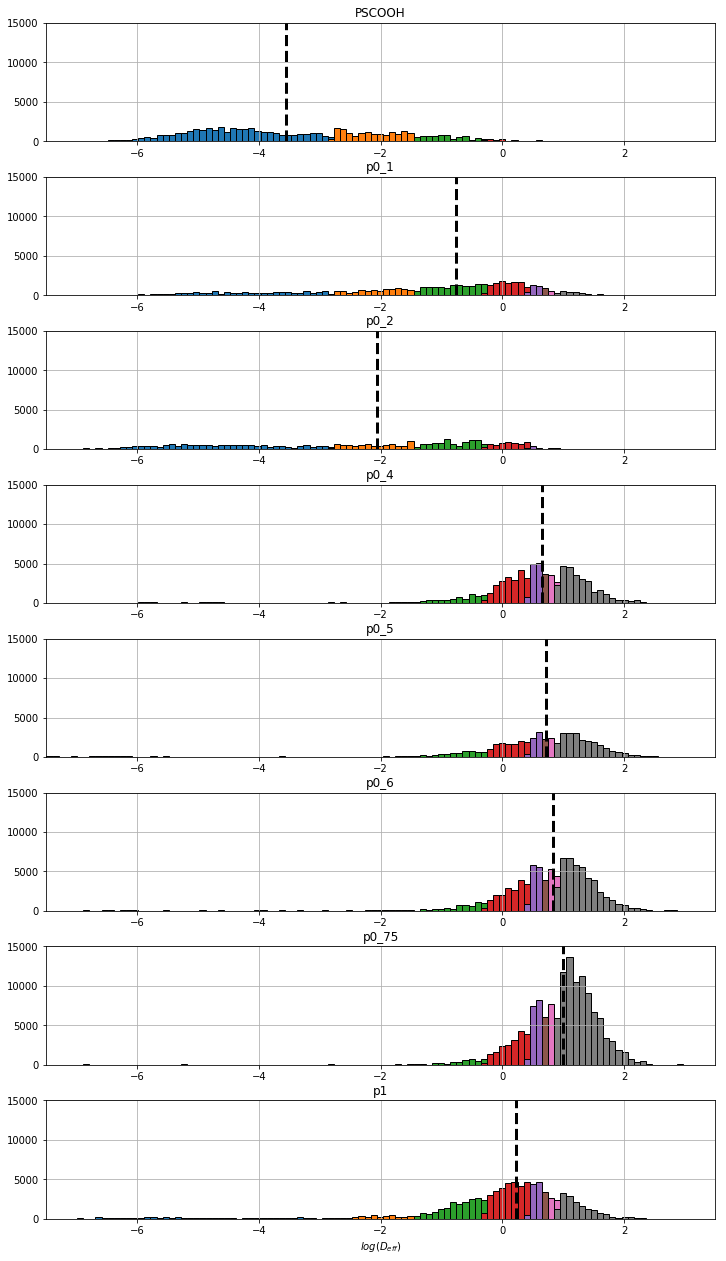

In [21]:
import matplotlib.pyplot as plt
Dbins = [-10, -2.807, -1.41, -0.269, 0.436, 0.684, 0.777, 0.912, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=8, figsize=(12,22))
counter = 0
means = []
#types = types_order
for ax in axes:
    means.append(X_train[X_train['Excess']==types[counter]]['LogMeanDeff2'].median())
    for i in range(8):
        X_train[(X_train['Excess']==types[counter]) & (Dbins[i] < X_train['LogMeanDeff2']) & (X_train['LogMeanDeff2'] < Dbins[i+1])].hist(column='LogMeanDeff2', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 15000])
    ax.axvline(X_train[X_train['Excess']==types[counter]]['LogMeanDeff2'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title(types[counter])
    if counter == 7:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1

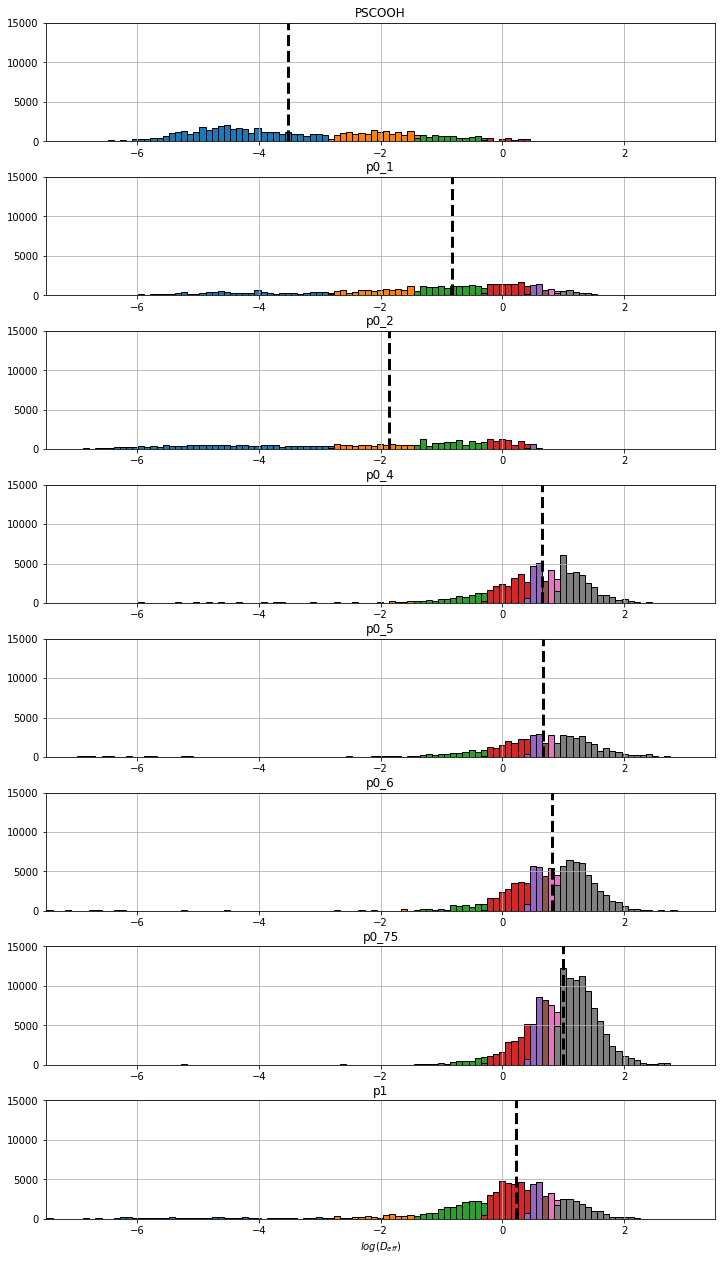

In [22]:
#Dbins = [-10, -6.538, -3.754, -0.808, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=8, figsize=(12, 22))
counter = 0
means = []
for ax in axes:
    means.append(X_test[X_test['Excess']==types[counter]]['LogMeanDeff2'].median())
    for i in range(8):
        X_test[(X_test['Excess']==types[counter]) & (Dbins[i] < X_test['LogMeanDeff2']) & (X_test['LogMeanDeff2'] < Dbins[i+1])].hist(column='LogMeanDeff2', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 15000])
    ax.axvline(X_test[X_test['Excess']==types[counter]]['LogMeanDeff2'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title(types[counter])
    if counter == 7:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1

In [16]:
from sklearn.metrics import classification_report

In [18]:
y_pred2 = list(pd.cut(X_train.LogMeanDeff2.values, bins=[-10, -2.807, -1.41, -0.269, 0.436, 0.684, 0.777, 0.912, 10], labels=types).astype(str))
y_true2 = X_train['Excess'].values

print(classification_report(y_true2, y_pred2, digits=4))

             precision    recall  f1-score   support

     PSCOOH     0.5042    0.6102    0.5522     59071
        nan     0.0000    0.0000    0.0000         0
       p0_1     0.1879    0.2586    0.2176     50937
       p0_2     0.2010    0.1934    0.1971     39916
       p0_4     0.1836    0.1492    0.1646     82684
       p0_5     0.1188    0.0525    0.0729     61901
       p0_6     0.2477    0.0932    0.1354    104356
      p0_75     0.4342    0.5668    0.4918    152656
         p1     0.2503    0.3105    0.2772     93949

avg / total     0.2875    0.3067    0.2865    645470



/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [19]:
y_pred2 = list(pd.cut(X_test.LogMeanDeff2.values, bins=[-10, -2.807, -1.41, -0.269, 0.436, 0.684, 0.777, 0.912, 10], labels=types).astype(str))
y_true2 = X_test['Excess'].values

print(classification_report(y_true2, y_pred2, digits=4))

             precision    recall  f1-score   support

     PSCOOH     0.5082    0.6003    0.5504     60478
        nan     0.0000    0.0000    0.0000         0
       p0_1     0.1803    0.2518    0.2101     50558
       p0_2     0.1880    0.1751    0.1813     41699
       p0_4     0.1819    0.1441    0.1608     82787
       p0_5     0.0862    0.0378    0.0525     62461
       p0_6     0.2306    0.0950    0.1346    104215
      p0_75     0.4278    0.5558    0.4835    150696
         p1     0.2482    0.3092    0.2754     94043

avg / total     0.2782    0.2989    0.2795    646937



/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [26]:
meanD = np.array(means)
meanD.sort()
Dbins = meanD[0:-1] + np.diff(meanD)/2
print(Dbins)

[-2.80712794 -1.40957642 -0.00327464]


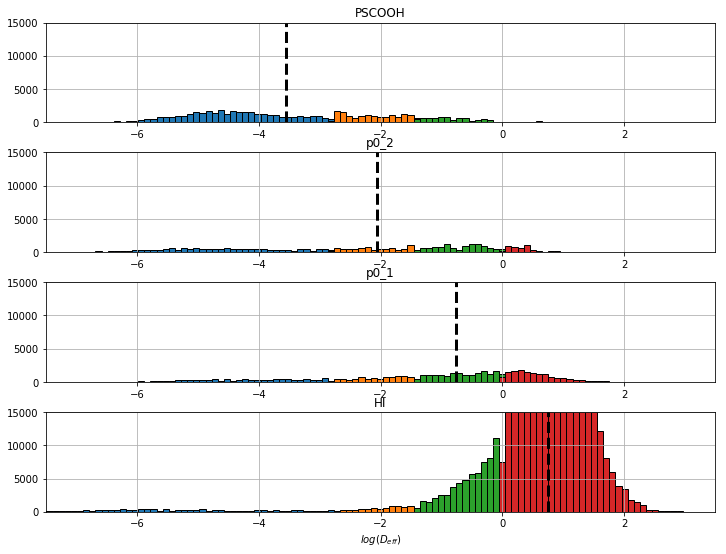

In [27]:
Dbins = [-10, -2.807, -1.41, -0.00327, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=4, figsize=(12,9))
counter = 0
means = []
#types = types_order
for ax in axes:
    means.append(X_train[X_train['Excess Thresh']==types[counter]]['LogMeanDeff2'].median())
    for i in range(4):
        X_train[(X_train['Excess Thresh']==types[counter]) & (Dbins[i] < X_train['LogMeanDeff2']) & (X_train['LogMeanDeff2'] < Dbins[i+1])].hist(column='LogMeanDeff2', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 15000])
    ax.axvline(X_train[X_train['Excess Thresh']==types[counter]]['LogMeanDeff2'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title(types[counter])
    if counter == 3:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1

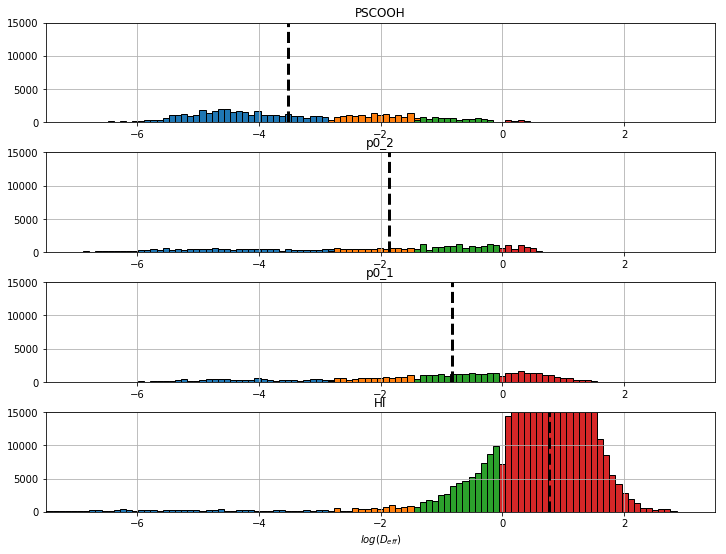

In [29]:
#Dbins = [-10, -6.538, -3.754, -0.808, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=4, figsize=(12, 9))
counter = 0
means = []
for ax in axes:
    means.append(X_test[X_test['Excess Thresh']==types[counter]]['LogMeanDeff2'].median())
    for i in range(4):
        X_test[(X_test['Excess Thresh']==types[counter]) & (Dbins[i] < X_test['LogMeanDeff2']) & (X_test['LogMeanDeff2'] < Dbins[i+1])].hist(column='LogMeanDeff2', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 15000])
    ax.axvline(X_test[X_test['Excess Thresh']==types[counter]]['LogMeanDeff2'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title(types[counter])
    if counter == 3:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1

In [30]:
y_pred2 = list(pd.cut(X_train.LogMeanDeff2.values, bins=[-10, -2.807, -1.41, -0.00327, 10], labels=types).astype(str))
y_true2 = X_train['Excess Thresh'].values

print(classification_report(y_true2, y_pred2, digits=4))

             precision    recall  f1-score   support

         HI     0.9531    0.8010    0.8705    495546
     PSCOOH     0.5042    0.6102    0.5522     59071
        nan     0.0000    0.0000    0.0000         0
       p0_1     0.1690    0.3425    0.2263     50937
       p0_2     0.2010    0.1934    0.1971     39916

avg / total     0.8036    0.7098    0.7489    645470



/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [31]:
y_pred2 = list(pd.cut(X_test.LogMeanDeff2.values, bins=[-10, -2.807, -1.41, -0.00327, 10], labels=types).astype(str))
y_true2 = X_test['Excess Thresh'].values

print(classification_report(y_true2, y_pred2, digits=4))

             precision    recall  f1-score   support

         HI     0.9500    0.8000    0.8686    494202
     PSCOOH     0.5082    0.6003    0.5504     60478
        nan     0.0000    0.0000    0.0000         0
       p0_1     0.1589    0.3246    0.2134     50558
       p0_2     0.1880    0.1751    0.1813     41699

avg / total     0.7978    0.7039    0.7433    646937



/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [ ]:
#PCA analyses with too many datapoints fail. You get rows with lots of NAs. I'm going to try making a subset of the data first
#and then do a PCA analysis on that.

#include all in analysis
import random
subset = np.sort(np.array(random.sample(range(fstats_tot.shape[0]), 500000)))
fstats_sub = fstats_tot.loc[subset, :].reset_index(drop=True)

In [ ]:
for typ in fstats_tot['Particle Size'].unique():
    fstats_type = fstats_tot[fstats_tot['Particle Size']==typ].reset_index(drop=True)
    print(fstats_type.shape)

In [ ]:
#with equal sample sizes for each particle type
import random
counter = 0
for typ in fstats_tot['Particle Size'].unique():
    fstats_type = fstats_tot[fstats_tot['Particle Size']==typ].reset_index(drop=True)
    print(fstats_type.shape)
    subset = np.sort(np.array(random.sample(range(fstats_type.shape[0]), 55000)))
    if counter == 0:
        fstats_sub = fstats_type.loc[subset, :].reset_index(drop=True)
    else:
        fstats_sub = fstats_sub.append(fstats_type.loc[subset, :].reset_index(drop=True), ignore_index=True)
    counter = counter + 1

In [3]:
#fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
fstats_num = fstats_tot.drop(nonnum, axis=1)
fstats_raw = fstats_num.as_matrix()
#fstats

In [4]:
fstats_tot['LogDeff1'] = np.log(fstats_tot.Deff1).replace([np.inf, -np.inf], np.nan)

/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [8]:
fstats_tot.head()

,Track_ID,alpha,D_fit,kurtosis,asymmetry1,asymmetry2,asymmetry3,AR,elongation,boundedness,...,Mean SN_Ratio,Std SN_Ratio,Mean Deff1,Std Deff1,Mean Deff2,Std Deff2,Excess,Video Number,Well,LogDeff1
0,0.0,1.366311e-02,1.490710,4.787013,0.828573,0.216744,0.232178,2.331565,0.571103,0.038703,...,0.536919,0.306166,1.084776,1.444987,0.086988,0.130898,PSCOOH,1,1,-1.787834
1,1.0,1.524197e-02,0.987794,3.304857,0.347292,0.508335,0.054590,1.280338,0.218956,0.078608,...,0.666120,0.530485,0.915651,0.993855,0.011886,0.014499,PSCOOH,1,1,-2.254519
2,2.0,2.081122e-09,0.045668,3.458635,0.128635,0.687053,0.017355,1.052605,0.049976,0.056940,...,0.562383,0.265553,0.548345,0.455742,0.122211,0.131151,PSCOOH,1,1,-5.568672
3,3.0,2.129315e-02,0.688365,3.669061,0.124442,0.691704,0.016745,1.103457,0.093757,0.050611,...,1.031782,0.545863,0.043776,0.022149,0.004372,0.002117,PSCOOH,1,1,-2.564145
4,4.0,1.331803e-04,0.059855,2.870541,0.091255,0.732119,0.012031,1.221362,0.181242,0.057435,...,0.626268,0.320452,1.166170,1.864220,0.239472,0.438206,PSCOOH,1,1,-5.287842


In [14]:
meanD = np.array(means)
meanD.sort()
Dbins = meanD[0:-1] + np.diff(meanD)/2
print(Dbins)

[-1.01089466 -0.30320845  0.50198258  1.13195966  1.20853417  1.25760008
  1.29173412]


In [ ]:
Dbins

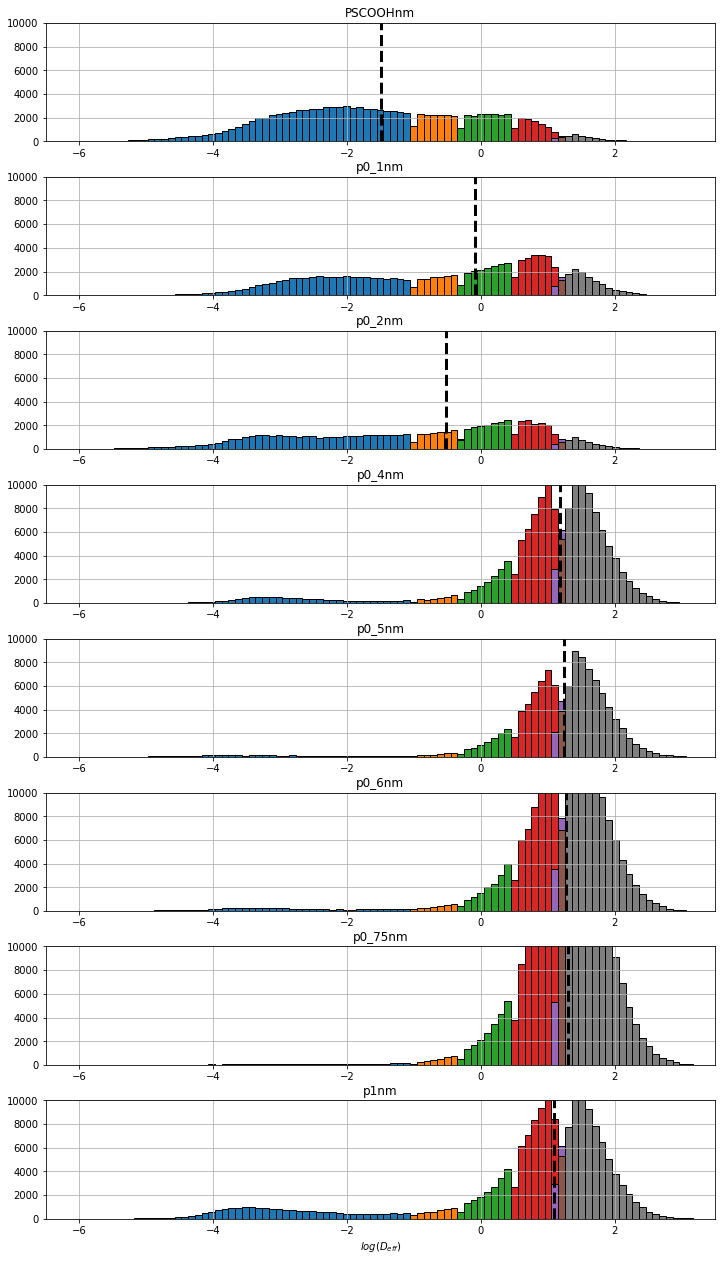

In [5]:
import matplotlib.pyplot as plt
Dbins = [-10, -1.01, -0.30, 0.50, 1.13, 1.21, 1.26, 1.29, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=8, figsize=(12, 22))
counter = 0
means = []
for ax in axes:
    means.append(fstats_tot[fstats_tot['Excess']==gels[counter]]['LogDeff1'].median())
    for i in range(8):
        fstats_tot[(fstats_tot['Excess']==gels[counter]) & (Dbins[i] < fstats_tot['LogDeff1']) & (fstats_tot['LogDeff1'] < Dbins[i+1])].hist(column='LogDeff1', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-6.5, 3.5])
        ax.set_ylim([0, 10000])
    ax.axvline(means[counter], color='k', linestyle='dashed', linewidth=3)
    ax.set_title(gels[counter]+ 'nm')
    if counter == 7:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1

In [10]:
print(classification_report(ytrue[ypred.isin(gels).values], ypred[ypred.isin(gels).values], digits=4))

             precision    recall  f1-score   support

     PSCOOH     0.3857    0.6003    0.4697    119581
       p0_1     0.1292    0.1816    0.1510    101502
       p0_2     0.1891    0.1209    0.1475     81655
       p0_4     0.1594    0.0354    0.0579    165476
       p0_5     0.1186    0.0551    0.0752    124368
       p0_6     0.2033    0.0220    0.0397    208574
      p0_75     0.3279    0.5134    0.4002    303353
         p1     0.1637    0.2782    0.2061    188010

avg / total     0.2232    0.2518    0.2096   1292519



In [7]:
from sklearn.metrics import classification_report

ypred = pd.Series(list(pd.cut(fstats_tot.LogDeff1.values, bins=Dbins, labels=['PSCOOH', 'p0_2', 'p0_1', 'p1', 'p0_5', 'p0_4', 'p0_6', 'p0_75'])))
ytrue = fstats_tot.Excess

#print(classification_report(ytrue[ypred.isin(gels)], ypred[ypred.isin(gels)], digits=4))

In [27]:
ytrue1 = pd.cut(fstats_tot.LogDeff1.values, bins=Dbins, labels=['PSCOOH', 'p0_2', 'p0_1', 'p1', 'p0_5', 'p0_4', 'p0_6', 'p0_75'])
ytrue1

[PSCOOH, PSCOOH, PSCOOH, PSCOOH, PSCOOH, ..., p1, p0_1, PSCOOH, p1, p1]
Length: 1292528
Categories (8, object): [PSCOOH < p0_2 < p0_1 < p1 < p0_5 < p0_4 < p0_6 < p0_75]

In [ ]:
y_pred3 = pd.Series(list(pd.cut(gelpred1.values, bins=[0, 0.6, 1.0, 100000], labels=['0_4', '0_8', '1_2']).astype(str)))
ypred3 = y_pred3.replace('nan', '0_4')
ytrue3 = fstats_play[fstats_play['Percent Agarose'].isin(['0_4', '0_8', '1_2'])]['Percent Agarose']

print(classification_report(ytrue3, ypred3, digits=4))

## PCA analysis

The pca.pca_analysis function provides a completely contained PCA analysis of the input trajectory features dataset. It includes options to impute NaN values (fill in with average values or drop them), and to scale features. Read the docstring for more information. 

In [5]:
pcadataset = pca.pca_analysis(fstats_tot, dropcols=nonnum, n_components=16)

Cumulative explained variance:
0 component: 0.27474105678103505
1 component: 0.38991687836201305
2 component: 0.46245986069088424
3 component: 0.5206895174028255
4 component: 0.571599443049748
5 component: 0.6070322976271559
6 component: 0.640011724635751
7 component: 0.6677724985861414
8 component: 0.6929819493683217
9 component: 0.7176322872978965
10 component: 0.7393225553354286
11 component: 0.7605670034030536
12 component: 0.7794958999687365
13 component: 0.7976836793023767
14 component: 0.8150594290850715
15 component: 0.831854372795463


In [6]:
pcadataset.final['Excess Thresh'] = pcadataset.final['Excess'].replace(['p0_4', 'p0_5', 'p0_6', 'p0_75', 'p1'], 'HI')
pcadataset.final = pcadataset.final[pcadataset.final.columns.tolist()[-1:] + pcadataset.final.columns.tolist()[:-1]]

In [5]:
pcadataset.components.to_csv('components.csv')
aws.upload_s3('components.csv', '{}/components.csv'.format(remote_folder, filename), bucket_name=bucket)

In [6]:
fstats_num.columns

Index(['alpha', 'D_fit', 'kurtosis', 'asymmetry1', 'asymmetry2', 'asymmetry3',
       'AR', 'elongation', 'boundedness', 'fractal_dim', 'trappedness',
       'efficiency', 'straightness', 'MSD_ratio', 'frames', 'Quality',
       'Mean_Intensity', 'SN_Ratio', 'Deff1', 'Deff2', 'Mean alpha',
       'Std alpha', 'Mean D_fit', 'Std D_fit', 'Mean kurtosis', 'Std kurtosis',
       'Mean asymmetry1', 'Std asymmetry1', 'Mean asymmetry2',
       'Std asymmetry2', 'Mean asymmetry3', 'Std asymmetry3', 'Mean AR',
       'Std AR', 'Mean elongation', 'Std elongation', 'Mean boundedness',
       'Std boundedness', 'Mean fractal_dim', 'Std fractal_dim',
       'Mean trappedness', 'Std trappedness', 'Mean efficiency',
       'Std efficiency', 'Mean straightness', 'Std straightness',
       'Mean MSD_ratio', 'Std MSD_ratio', 'Mean frames', 'Std frames',
       'Mean Quality', 'Std Quality', 'Mean SN_Ratio', 'Std SN_Ratio',
       'Mean Deff1', 'Std Deff1', 'Mean Deff2', 'Std Deff2'],
      dtype='object

In [ ]:
kmostat = pca.kmo(pcadataset.scaled)

The pca.kmo function calculates the Kaiser-Meyer-Olkin statistic, a measure of sampling adequacy. Check the docstring for more information.

In [ ]:
import scipy.stats as stat
stat.bartlett(pcadataset.scaled[0, :], pcadataset.scaled[1, :], pcadataset.scaled[2, :], pcadataset.scaled[3, :])

In [ ]:
newstr = ''
for i in range(pcadataset.scaled.shape[0]-1):
    newstr = newstr + 'pcadataset.scaled[{}, :], '.format(i)

newstr = 'stat.bartlett(' + newstr + 'pcadataset.scaled[{}, :])'.format(i+1)

In [ ]:
test = eval(newstr)

In [ ]:
test

## Visualization

Users can then compare average principle component values between subgroups of the data. In this case, all particles were taken from the same sample, so there are no experimental subgroups. I chose to compare short trajectories to long trajectories, as I would expect differences between the two groups.

In [7]:
import numpy as np
ncomp = 16
dicti = {}
#test = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==200].as_matrix()), axis=0))[-6:]
#test1 = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==500].as_matrix()), axis=0))[-6:]
dicti[0] = np.nanmean(pcadataset.final[pcadataset.final['Excess']=='PSCOOH'].values[:, -ncomp:], axis=0)
dicti[1] = np.nanmean(pcadataset.final[pcadataset.final['Excess']=='p0_1'].values[:, -ncomp:], axis=0)
dicti[2] = np.nanmean(pcadataset.final[pcadataset.final['Excess']=='p0_2'].values[:, -ncomp:], axis=0)
dicti[3] = np.nanmean(pcadataset.final[pcadataset.final['Excess']=='p0_4'].values[:, -ncomp:], axis=0)
dicti[4] = np.nanmean(pcadataset.final[pcadataset.final['Excess']=='p0_5'].values[:, -ncomp:], axis=0)
dicti[5] = np.nanmean(pcadataset.final[pcadataset.final['Excess']=='p0_6'].values[:, -ncomp:], axis=0)
dicti[6] = np.nanmean(pcadataset.final[pcadataset.final['Excess']=='p0_75'].values[:, -ncomp:], axis=0)
dicti[7] = np.nanmean(pcadataset.final[pcadataset.final['Excess']=='p1'].values[:, -ncomp:], axis=0)

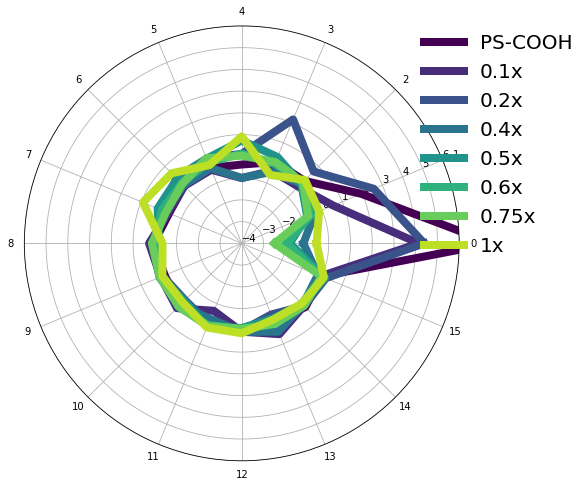

In [9]:
pca.plot_pca(dicti, savefig=True, labels=['PS-COOH', '0.1x', '0.2x', '0.4x', '0.5x', '0.6x', '0.75x', '1x'],
             rticks=np.linspace(-4, 6, 11))

The variable pcadataset.prcomps shows the user the major contributions to each of the new principle components. When observing the graph above, users can see that there are some differences between short trajectories and long trajectories in component 0 (asymmetry1 being the major contributor) and component 1 (elongation being the major contributor).

In [10]:
pcadataset.prcomps

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Mean Deff1,Mean elongation,efficiency,Std asymmetry1,Mean SN_Ratio,frames,D_fit,Std kurtosis,trappedness,Deff1,Std Deff2,Std MSD_ratio,Std fractal_dim,Std SN_Ratio,Std alpha,kurtosis
1,Mean fractal_dim,Mean AR,Mean asymmetry3,Std asymmetry2,Mean Quality,boundedness,alpha,Std trappedness,boundedness,kurtosis,Mean Deff2,Mean MSD_ratio,Std straightness,Std MSD_ratio,Deff2,SN_Ratio
2,Mean straightness,asymmetry3,straightness,Std elongation,Quality,trappedness,straightness,Std boundedness,frames,D_fit,Std kurtosis,Std alpha,Std efficiency,Mean_Intensity,Std D_fit,Std Quality
3,Mean efficiency,Mean asymmetry3,Mean elongation,Std asymmetry3,SN_Ratio,Std boundedness,efficiency,Mean kurtosis,Std trappedness,frames,Mean kurtosis,Std trappedness,Std frames,Deff2,Mean alpha,Std kurtosis
4,Mean trappedness,AR,asymmetry1,Std trappedness,Std Quality,Std trappedness,Mean_Intensity,Mean_Intensity,Std boundedness,fractal_dim,Mean_Intensity,Std boundedness,Mean frames,Mean SN_Ratio,Mean D_fit,Mean kurtosis


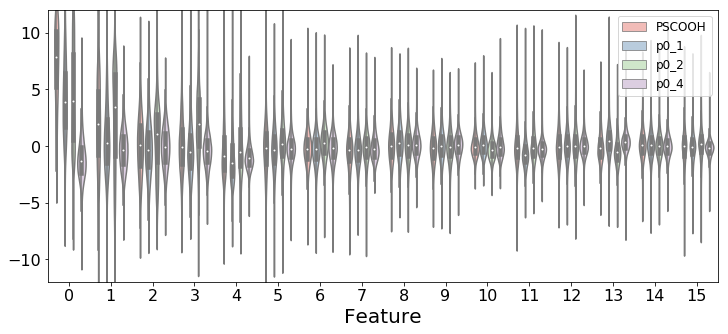

In [12]:
labels=gels
feats = pca.feature_violin(pcadataset.final[pcadataset.final.Excess.isin(gels[0:4])], label='Excess', lvals=labels[0:4],
                           fsubset=ncomp, yrange=[-12, 12])

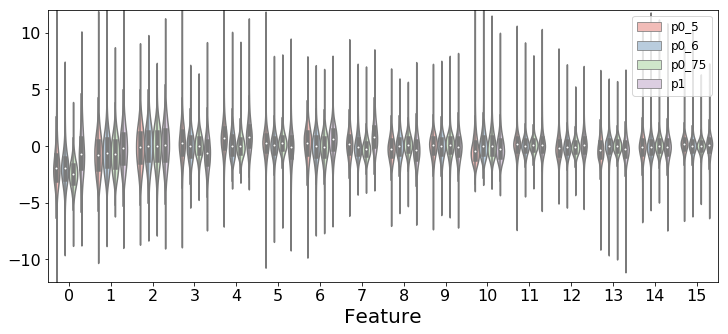

In [13]:
feats = pca.feature_violin(pcadataset.final[pcadataset.final.Excess.isin(gels[4:8])], label='Excess', lvals=labels[4:8],
                           fsubset=ncomp, yrange=[-12, 12])

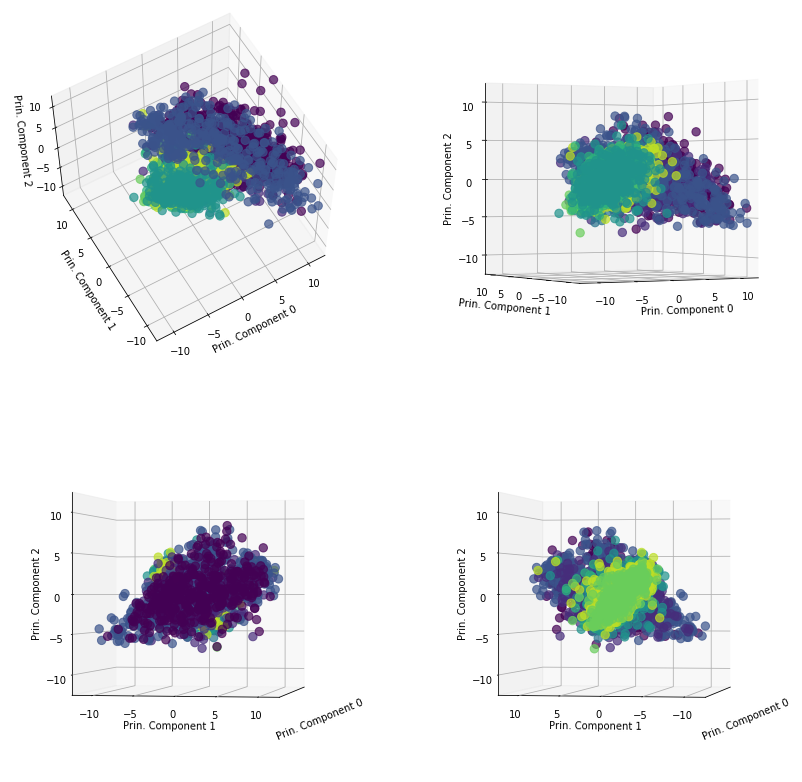

In [14]:
fstats1 = pca.feature_plot_3D(pcadataset.final, label='Excess', lvals=labels, randcount=400, ylim=[-12, 12],
                              xlim=[-12, 12], zlim=[-12, 12])

In [ ]:
trainp = np.array([])
testp = np.array([])

for i in range(0, 20):
    KNNmod, X, y = pca.build_model(pcadataset.final, 'Percent Agarose', labels, equal_sampling=True,
                                       tsize=500, input_cols=ncomp, model='MLP', NNhidden_layer=(6, 2))
    trainp = np.append(trainp, pca.predict_model(KNNmod, X, y))
    
    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final['Particle Size'].values
    testp = np.append(testp, pca.predict_model(KNNmod, X2, y2))
    print('Run {}: {}'.format(i, testp[i]))

In [ ]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

In [ ]:
fstats_num

## Neural Network

In [5]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [16]:
featofvar = 'Excess'
test = pcadataset.final.values[:, -ncomp:]
y = pcadataset.final[featofvar].values

for run in range(1):
    X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.91255774
Validation score: 0.652852
Iteration 2, loss = 0.85614195
Validation score: 0.661053
Iteration 3, loss = 0.83803344
Validation score: 0.666611
Iteration 4, loss = 0.82553764
Validation score: 0.673999
Iteration 5, loss = 0.81567783
Validation score: 0.671498
Iteration 6, loss = 0.80718669
Validation score: 0.679609
Iteration 7, loss = 0.79931311
Validation score: 0.683464
Iteration 8, loss = 0.79288695
Validation score: 0.690517
Iteration 9, loss = 0.78611304
Validation score: 0.688416
Iteration 10, loss = 0.78110998
Validation score: 0.696978
Iteration 11, loss = 0.77538800
Validation score: 0.691175
Iteration 12, loss = 0.77021909
Validation score: 0.693664
Iteration 13, loss = 0.76644352
Validation score: 0.698125
Iteration 14, loss = 0.76287035
Validation score: 0.699208
Iteration 15, loss = 0.75860437
Validation score: 0.699814
Iteration 16, loss = 0.75642367
Validation score: 0.695172
Iteration 17, loss = 0.75302564
Validation score: 0.703167
Iterat

In [17]:
#featofvar = 'Percent Agarose'
#ncomp=16
test = pcadataset.final[pcadataset.final['Excess'].isin(['PSCOOH', 'p0_2', 'p0_5', 'p0_75'])].values[:, -ncomp:]
y = pcadataset.final[pcadataset.final['Excess'].isin(['PSCOOH', 'p0_2', 'p0_5', 'p0_75'])][featofvar].values

for run in range(1):
    X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.31532136
Validation score: 0.889766
Iteration 2, loss = 0.27307945
Validation score: 0.891595
Iteration 3, loss = 0.26255345
Validation score: 0.890932
Iteration 4, loss = 0.25394149
Validation score: 0.904950
Iteration 5, loss = 0.24746716
Validation score: 0.902565
Iteration 6, loss = 0.24187205
Validation score: 0.908686
Iteration 7, loss = 0.23674791
Validation score: 0.911416
Iteration 8, loss = 0.23226245
Validation score: 0.910939
Iteration 9, loss = 0.22827041
Validation score: 0.912369
Iteration 10, loss = 0.22456937
Validation score: 0.914039
Iteration 11, loss = 0.22106511
Validation score: 0.913111
Iteration 12, loss = 0.21746198
Validation score: 0.913509
Iteration 13, loss = 0.21398048
Validation score: 0.912078
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.001000
Iteration 14, loss = 0.19226661
Validation score: 0.926758
Iteration 15, loss = 0.18947496
Validation score: 0.929488
Iterat

In [18]:
#featofvar = 'Percent Agarose'
#ncomp=16
test = pcadataset.final[pcadataset.final['Excess'].isin(['p0_1', 'p0_4', 'p0_6', 'p1'])].values[:, -ncomp:]
y = pcadataset.final[pcadataset.final['Excess'].isin(['p0_1', 'p0_4', 'p0_6', 'p1'])][featofvar].values

for run in range(1):
    X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.55504194
Validation score: 0.773296
Iteration 2, loss = 0.51738743
Validation score: 0.777541
Iteration 3, loss = 0.50493895
Validation score: 0.781685
Iteration 4, loss = 0.49438081
Validation score: 0.789496
Iteration 5, loss = 0.48498585
Validation score: 0.793414
Iteration 6, loss = 0.47589696
Validation score: 0.797709
Iteration 7, loss = 0.46744461
Validation score: 0.801552
Iteration 8, loss = 0.45922316
Validation score: 0.803361
Iteration 9, loss = 0.45074695
Validation score: 0.810318
Iteration 10, loss = 0.44354290
Validation score: 0.813608
Iteration 11, loss = 0.43636050
Validation score: 0.813257
Iteration 12, loss = 0.42949312
Validation score: 0.810745
Iteration 13, loss = 0.42299713
Validation score: 0.822148
Iteration 14, loss = 0.41674516
Validation score: 0.828703
Iteration 15, loss = 0.41051666
Validation score: 0.822826
Iteration 16, loss = 0.40540214
Validation score: 0.833325
Iteration 17, loss = 0.40031050
Validation score: 0.828653
Iterat

In [6]:
pcadataset.final['Excess Thresh'] = pcadataset.final['Excess'].replace(['p0_4', 'p0_5', 'p0_6', 'p0_75', 'p1'], 'HI')
pcadataset.final = pcadataset.final[pcadataset.final.columns.tolist()[-1:] + pcadataset.final.columns.tolist()[:-1]]

In [8]:
featofvar = 'Excess Thresh'
ncomp = 16
test = pcadataset.final.values[:, -ncomp:]
y = pcadataset.final[featofvar].values

for run in range(1):
    X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.15747063
Validation score: 0.944889
Iteration 2, loss = 0.13779088
Validation score: 0.947042
Iteration 3, loss = 0.13250041
Validation score: 0.949956
Iteration 4, loss = 0.12878275
Validation score: 0.950936
Iteration 5, loss = 0.12537302
Validation score: 0.952238
Iteration 6, loss = 0.12255886
Validation score: 0.952419
Iteration 7, loss = 0.12006226
Validation score: 0.953476
Iteration 8, loss = 0.11764519
Validation score: 0.954405
Iteration 9, loss = 0.11552419
Validation score: 0.957293
Iteration 10, loss = 0.11340164
Validation score: 0.955913
Iteration 11, loss = 0.11179153
Validation score: 0.957564
Iteration 12, loss = 0.10976404
Validation score: 0.959717
Iteration 13, loss = 0.10825649
Validation score: 0.958106
Iteration 14, loss = 0.10649817
Validation score: 0.958028
Iteration 15, loss = 0.10499147
Validation score: 0.958995
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.001000
Iterat

In [8]:
bins = list(range(0, 2048+1, 256))
pcadataset.final['binx'] = pd.cut(pcadataset.final.X, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
pcadataset.final['biny'] = pd.cut(pcadataset.final.Y, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
pcadataset.final['bins'] = 8*pcadataset.final['binx'] + pcadataset.final['biny']
pcadataset.final = pcadataset.final[np.isfinite(pcadataset.final.bins)]
pcadataset.final.bins = pcadataset.final.bins.astype(int)

cols = pcadataset.final.columns.tolist()
cols = cols[-3:] + cols[:-3]
pcadataset.final = pcadataset.final[cols]

def checkerboard(size):
    rows = int(size/2)
    checks = list(range(0, size*size, size+1))
    
    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(2*i + (size+1)*j)

    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(size*size - 1 - (2*i + (size+1)*j))
    checks.sort()
    return checks

In [10]:
featofvar = 'Excess'
ncomp = 16

X_train = pcadataset.final[pcadataset.final.bins.isin(checkerboard(8))].values[:, -ncomp:]
X_test = pcadataset.final[~pcadataset.final.bins.isin(checkerboard(8))].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final.bins.isin(checkerboard(8))][featofvar].values
y_test = pcadataset.final[~pcadataset.final.bins.isin(checkerboard(8))][featofvar].values

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.90826218
Validation score: 0.663346
Iteration 2, loss = 0.83918373
Validation score: 0.676530
Iteration 3, loss = 0.81037383
Validation score: 0.688460
Iteration 4, loss = 0.78615179
Validation score: 0.696872
Iteration 5, loss = 0.76474747
Validation score: 0.709700
Iteration 6, loss = 0.74620325
Validation score: 0.721459
Iteration 7, loss = 0.72927665
Validation score: 0.721800
Iteration 8, loss = 0.71526611
Validation score: 0.728771
Iteration 9, loss = 0.70254976
Validation score: 0.730352
Iteration 10, loss = 0.69199680
Validation score: 0.730460
Iteration 11, loss = 0.68154695
Validation score: 0.745069
Iteration 12, loss = 0.67266475
Validation score: 0.742792
Iteration 13, loss = 0.66496649
Validation score: 0.756255
Iteration 14, loss = 0.65751354
Validation score: 0.755837
Iteration 15, loss = 0.65163763
Validation score: 0.750399
Iteration 16, loss = 0.64591158
Validation score: 0.761104
Iteration 17, loss = 0.64095811
Validation score: 0.768215
Iterat

In [11]:
featofvar = 'Excess Thresh'
ncomp = 16

X_train = pcadataset.final[pcadataset.final.bins.isin(checkerboard(8))].values[:, -ncomp:]
X_test = pcadataset.final[~pcadataset.final.bins.isin(checkerboard(8))].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final.bins.isin(checkerboard(8))][featofvar].values
y_test = pcadataset.final[~pcadataset.final.bins.isin(checkerboard(8))][featofvar].values

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.15189093
Validation score: 0.945420
Iteration 2, loss = 0.12888387
Validation score: 0.949076
Iteration 3, loss = 0.12156847
Validation score: 0.954312
Iteration 4, loss = 0.11620390
Validation score: 0.956977
Iteration 5, loss = 0.11147861
Validation score: 0.956590
Iteration 6, loss = 0.10716938
Validation score: 0.958433
Iteration 7, loss = 0.10311030
Validation score: 0.962926
Iteration 8, loss = 0.09967029
Validation score: 0.960525
Iteration 9, loss = 0.09610606
Validation score: 0.965002
Iteration 10, loss = 0.09323300
Validation score: 0.967218
Iteration 11, loss = 0.09001737
Validation score: 0.965885
Iteration 12, loss = 0.08759520
Validation score: 0.966691
Iteration 13, loss = 0.08500592
Validation score: 0.969061
Iteration 14, loss = 0.08262990
Validation score: 0.970549
Iteration 15, loss = 0.08064255
Validation score: 0.973322
Iteration 16, loss = 0.07827507
Validation score: 0.970765
Iteration 17, loss = 0.07672001
Validation score: 0.973182
Iterat

In [12]:
pcadataset.final['Excess Thresh'] = pcadataset.final['Excess'].replace(['p0_5', 'p0_6', 'p0_75', 'p1'], 'HI')
#pcadataset.final = pcadataset.final[pcadataset.final.columns.tolist()[-1:] + pcadataset.final.columns.tolist()[:-1]]

In [15]:
featofvar = 'Excess Thresh'
ncomp = 16

X_train = pcadataset.final[pcadataset.final.bins.isin(checkerboard(8))].values[:, -ncomp:]
X_test = pcadataset.final[~pcadataset.final.bins.isin(checkerboard(8))].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final.bins.isin(checkerboard(8))][featofvar].values
y_test = pcadataset.final[~pcadataset.final.bins.isin(checkerboard(8))][featofvar].values

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.33540531
Validation score: 0.866160
Iteration 2, loss = 0.30153983
Validation score: 0.876989
Iteration 3, loss = 0.28863218
Validation score: 0.882055
Iteration 4, loss = 0.27840105
Validation score: 0.885758
Iteration 5, loss = 0.26884040
Validation score: 0.891552
Iteration 6, loss = 0.25991392
Validation score: 0.894294
Iteration 7, loss = 0.25229582
Validation score: 0.900522
Iteration 8, loss = 0.24534436
Validation score: 0.904163
Iteration 9, loss = 0.23901246
Validation score: 0.903047
Iteration 10, loss = 0.23327938
Validation score: 0.913629
Iteration 11, loss = 0.22767577
Validation score: 0.909028
Iteration 12, loss = 0.22340794
Validation score: 0.909632
Iteration 13, loss = 0.21914686
Validation score: 0.915271
Iteration 14, loss = 0.21488995
Validation score: 0.916278
Iteration 15, loss = 0.21128209
Validation score: 0.919346
Iteration 16, loss = 0.20867538
Validation score: 0.913288
Iteration 17, loss = 0.20545290
Validation score: 0.924303
Iterat

In [ ]:
kb = 1.381*10**-23
T = 313
nu = 0.000397


#size2 = 2*10**9*10**12*kb*T/(fstats_tot.Deff1.values*6*np.pi*nu)
Draw = kb*T*10**9*10**12/(6*np.pi*nu*140)
Drat = fstats_play.Deff1/Draw

In [ ]:
from scipy.optimize import curve_fit
def pore_model(x, a, b):
    return np.exp(-np.pi*((70+b)/(a*(x**-0.75)+2*b))**2)
    

In [ ]:
means1 = np.log(pore_model(np.array([0.4, 0.6, 0.8, 1.0, 1.2]), a, b)*Draw)
means1

In [ ]:
Dbins2 = np.log(pore_model(np.array([0.5, 0.7, 0.9, 1.1]), a, b)*Draw)
Dbins2

In [ ]:
import matplotlib.pyplot as plt
Dbins = [-10, 0.46210, 0.665, 0.865, 1.0576, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=5, figsize=(12, 13))
counter = 0
means = []
for ax in axes:
    means.append(fstats_tot[fstats_tot['Percent Agarose']==gels[counter]]['LogDeff1'].median())
    for i in range(5):
        fstats_tot[(fstats_tot['Percent Agarose']==gels[counter]) & (Dbins[i] < fstats_tot['LogDeff1']) & (fstats_tot['LogDeff1'] < Dbins[i+1])].hist(column='LogDeff1', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 10000])
    ax.axvline(means1[counter], color='k', linestyle='dashed', linewidth=3)
    ax.set_title(gels[counter]+ 'nm')
    if counter == 4:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1

In [ ]:
pore_model(ngels, 100, 40)

In [ ]:
fstats_tot['Percent Agarose Int'] = fstats_tot['Percent Agarose']

In [ ]:
fstats_tot['Percent Agarose Int'] = fstats_tot['Percent Agarose Int'].replace('0_4', 0.4)
fstats_tot['Percent Agarose Int'] = fstats_tot['Percent Agarose Int'].replace('0_6', 0.6)
fstats_tot['Percent Agarose Int'] = fstats_tot['Percent Agarose Int'].replace('0_8', 0.8)
fstats_tot['Percent Agarose Int'] = fstats_tot['Percent Agarose Int'].replace('1_0', 1.0)
fstats_tot['Percent Agarose Int'] = fstats_tot['Percent Agarose Int'].replace('1_2', 1.2)

In [ ]:
fstats_tot['Percent Agarose Int'].mean()

In [ ]:
nmeans = np.exp(np.array(means))/Draw
nmeans

In [ ]:
ngels = np.array([0.4, 0.6, 0.8, 1.0, 1.2])
ngels

In [ ]:
popt, pcov = curve_fit(pore_model, ngels, nmeans, p0=[100, 40])

In [ ]:
a = popt[0]
b = popt[1]
gelpred = (((70+b)/np.sqrt(-np.log(Drat)/np.pi)) - 2*b)/a

In [ ]:
gelpred

In [ ]:
y_pred2 = pd.Series(list(pd.cut(gelpred.values, bins=[0, 0.5, 0.7, 0.9, 1.1, 100000], labels=['0_4', '0_6', '0_8', '1_0', '1_2']).astype(str)))

In [ ]:
ypred2 = y_pred2.replace('nan', '0_4')

In [ ]:
ytrue2 = fstats_play['Percent Agarose']

In [ ]:
print(classification_report(ytrue2, ypred2, digits=4))

In [ ]:
fstats_tot['LogDeff1'] = np.log(fstats_tot.Deff1).replace([np.inf, -np.inf], np.nan)

In [ ]:
meanD = np.array(means)
meanD.sort()
Dbins = meanD[0:-1] + np.diff(meanD)/2
print(Dbins)

In [ ]:
Drat1 = fstats_play[fstats_play['Percent Agarose'].isin(['0_4', '0_8', '1_2'])].Deff1/Draw

gelpred1 = (((70+b)/np.sqrt(-np.log(Drat1)/np.pi)) - 2*b)/a
y_pred3 = pd.Series(list(pd.cut(gelpred1.values, bins=[0, 0.6, 1.0, 100000], labels=['0_4', '0_8', '1_2']).astype(str)))
ypred3 = y_pred3.replace('nan', '0_4')
ytrue3 = fstats_play[fstats_play['Percent Agarose'].isin(['0_4', '0_8', '1_2'])]['Percent Agarose']

print(classification_report(ytrue3, ypred3, digits=4))

In [ ]:
import matplotlib.pyplot as plt
Dbins = [-10, 0.520, 0.5686, 0.7651, 1.0865, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=5, figsize=(12, 13))
counter = 0
means = []
for ax in axes:
    means.append(fstats_tot[fstats_tot['Percent Agarose']==gels[counter]]['LogDeff1'].median())
    for i in range(5):
        fstats_tot[(fstats_tot['Percent Agarose']==gels[counter]) & (Dbins[i] < fstats_tot['LogDeff1']) & (fstats_tot['LogDeff1'] < Dbins[i+1])].hist(column='LogDeff1', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 10000])
    ax.axvline(fstats_tot[fstats_tot['Percent Agarose']==gels[counter]]['LogDeff1'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title(gels[counter]+ 'nm')
    if counter == 4:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1

In [ ]:
y_true2 = fstats_tot['Percent Agarose'].values
y_pred2 = list(pd.cut(fstats_tot['LogDeff1'].values, bins=Dbins, labels=['1_2', '1_0', '0_8', '0_6', '0_4']).astype(str))
print(classification_report(y_true2, y_pred2, digits=4))

In [ ]:
meanD = np.array(means)
meanD.sort()
Dbins = meanD[0:-1] + np.diff(meanD)/2
print(Dbins)

In [ ]:
import matplotlib.pyplot as plt
Dbins = [-10, 0.56440, 0.9344, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=3, figsize=(12, 13))
gels1 = ['0_4', '0_8', '1_2']
counter = 0
means = []
for ax in axes:
    means.append(fstats_tot[fstats_tot['Percent Agarose']==gels1[counter]]['LogDeff1'].median())
    for i in range(3):
        fstats_tot[(fstats_tot['Percent Agarose']==gels1[counter]) & (Dbins[i] < fstats_tot['LogDeff1']) & (fstats_tot['LogDeff1'] < Dbins[i+1])].hist(column='LogDeff1', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 10000])
    ax.axvline(fstats_tot[fstats_tot['Percent Agarose']==gels1[counter]]['LogDeff1'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title(gels1[counter]+ 'nm')
    if counter == 2:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1

In [ ]:
y_true2 = fstats_tot[fstats_tot['Percent Agarose'].isin(['0_4', '0_8', '1_2'])]['Percent Agarose'].values
y_pred2 = list(pd.cut(fstats_tot[fstats_tot['Percent Agarose'].isin(['0_4', '0_8', '1_2'])]['LogDeff1'].values, bins=Dbins, labels=['1_2', '0_8', '0_4']).astype(str))
print(classification_report(y_true2, y_pred2, digits=4))

In [ ]:
fstats_tot['LogMeanDeff1'] = np.log(fstats_tot['Mean Deff1']).replace([np.inf, -np.inf], np.nan)

In [ ]:
meanD = np.array(means)
meanD.sort()
Dbins = meanD[0:-1] + np.diff(meanD)/2
print(Dbins)

In [ ]:
means

In [ ]:
import matplotlib.pyplot as plt
Dbins = [-10, 0.6748, 0.7152, 0.8690, 1.172, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=5, figsize=(12, 11))
counter = 0
means = []
for ax in axes:
    means.append(fstats_tot[fstats_tot['Percent Agarose']==gels[counter]]['LogMeanDeff1'].median())
    for i in range(5):
        fstats_tot[(fstats_tot['Percent Agarose']==gels[counter]) & (Dbins[i] < fstats_tot['LogMeanDeff1']) & (fstats_tot['LogMeanDeff1'] < Dbins[i+1])].hist(column='LogMeanDeff1', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-6.5, 3.5])
        ax.set_ylim([0, 12000])
    ax.axvline(fstats_tot[fstats_tot['Percent Agarose']==gels[counter]]['LogMeanDeff1'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title(gels[counter]+ 'nm')
    if counter == 2:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1

In [ ]:
y_true2 = fstats_tot['Percent Agarose'].values
y_pred2 = list(pd.cut(fstats_tot['LogMeanDeff1'].values, bins=Dbins, labels=['1_2', '1_0', '0_8', '0_6', '0_4']).astype(str))
print(classification_report(y_true2, y_pred2, digits=4))

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 60])
#ax1.set_ylim([0.04, 0.18])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
#ax2.set_ylim([0.94, 0.99])
ax2.set_ylabel('Validation Scores')

In [ ]:
print('Training Results')
y_true1, y_pred1 = y_train, clf.predict(X_train)
print(classification_report(y_true1, y_pred1, digits=4))

print('Test Results')
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred, digits=4))

In [ ]:
classification_report()

In [ ]:
Deff1 = fstats_sub.Deff1.values

In [ ]:
bins = [0, 1.872, 3.858, 10**20]
binned = np.histogram(Deff1, [0, 1.872, 3.858, 10**20])

In [ ]:
binned

In [ ]:
y_pred2 = list(pd.cut(fstats_tot.Deff1.values, bins=[0, 1.872, 3.858, 1000], labels=['500', '200', '100']).astype(str))
y_true2 = fstats_tot['Particle Size'].values

In [ ]:
print(classification_report(y_true2, y_pred2, digits=4))

In [ ]:
kb = 1.381*10**-23
T = 303
nu = 0.000797


size2 = 2*10**9*10**12*kb*T/(fstats_tot.Deff1.values*6*np.pi*nu)

In [ ]:
y_pred2 = list(pd.cut(size2, bins=[-100, 150, 350, 1000000], labels=['100', '200', '500']).astype(str))

In [ ]:
print(classification_report(y_true2, y_pred2, digits=4))

In [ ]:
fstats_tot.hist(column='Deff1', by='Particle Size', sharex=True, bins=np.linspace(0, 10, 100),
                figsize=(9, 7), grid=False, layout=(3,1), sharey=True, )

In [ ]:
fstats_tot['LogDeff1'] = np.log(fstats_tot.Deff1).replace([np.inf, -np.inf], np.nan)

In [ ]:
bins = np.linspace(-10, 10, 200)
axes = fstats_tot.hist(column='LogDeff1', by='Particle Size', layout=(3, 1), bins=bins, sharex=True, sharey=True,
                        figsize=(10, 8), edgecolor='k')

means = []
types2 = ['100', '200', '500']
for ax, typ in zip(axes, types2):
    ax.set_ylim([0,10000])
    #ax.set_xscale("log", nonposx='clip')
    ax.set_xlim([-7.5,3.5])
    means.append(fstats_tot[fstats_tot['Particle Size']==typ]['LogDeff1'].median())
    ax.axvline(fstats_tot[fstats_tot['Particle Size']==typ]['LogDeff1'].median(), color='k', linestyle='dashed', linewidth=3)

In [ ]:
means

In [ ]:
meanD = np.array(means)
meanD.sort()
Dbins = meanD[0:-1] + np.diff(meanD)/2
print(Dbins)

In [ ]:
import matplotlib.pyplot as plt
Dbins = [-10, -0.233, 0.895, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=3, figsize=(12, 9))
counter = 0
means = []
for ax in axes:
    means.append(fstats_tot[fstats_tot['Particle Size']==sizes[counter]]['LogDeff1'].median())
    for i in range(3):
        fstats_tot[(fstats_tot['Particle Size']==sizes[counter]) & (Dbins[i] < fstats_tot['LogDeff1']) & (fstats_tot['LogDeff1'] < Dbins[i+1])].hist(column='LogDeff1', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 10000])
    ax.axvline(fstats_tot[fstats_tot['Particle Size']==sizes[counter]]['LogDeff1'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title(sizes[counter]+ 'nm')
    if counter == 2:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1

In [ ]:
y_true2 = fstats_tot['Particle Size'].values
y_pred2 = list(pd.cut(fstats_tot['LogDeff1'].values, bins=Dbins, labels=['500', '200', '100']).astype(str))
print(classification_report(y_true2, y_pred2, digits=4))

In [ ]:
fstats_tot['LogMeanDeff1'] = np.log(fstats_tot['Mean Deff1']).replace([np.inf, -np.inf], np.nan)

In [ ]:
meanD = np.array(means)
meanD.sort()
Dbins = meanD[0:-1] + np.diff(meanD)/2
print(Dbins)

In [ ]:
Dbins = [-10, -0.0937, 0.9617, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=3, figsize=(12, 9))
counter = 0
means = []
for ax in axes:
    means.append(fstats_tot[fstats_tot['Particle Size']==sizes[counter]]['LogMeanDeff1'].median())
    for i in range(3):
        fstats_tot[(fstats_tot['Particle Size']==sizes[counter]) & (Dbins[i] < fstats_tot['LogMeanDeff1']) & (fstats_tot['LogMeanDeff1'] < Dbins[i+1])].hist(column='LogMeanDeff1', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 10000])
    ax.axvline(fstats_tot[fstats_tot['Particle Size']==sizes[counter]]['LogMeanDeff1'].median(), color='k', linestyle='dashed', linewidth=3)
    ax.set_title(sizes[counter]+ 'nm')
    if counter == 2:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1

In [ ]:
y_true2 = fstats_tot['Particle Size'].values
y_pred2 = list(pd.cut(fstats_tot['LogMeanDeff1'].values, bins=Dbins, labels=['500', '200', '100']).astype(str))
print(classification_report(y_true2, y_pred2, digits=4))

In [ ]:
y_pred2 = list(pd.cut(size2, bins=[-100, 150, 350, 1000000], labels=['100', '200', '500']).astype(str))
print(classification_report(y_true2, y_pred2, digits=4))

In [ ]:
size3 = np.random.rand(len(size2))
y_pred2 = list(pd.cut(size3, bins=[0, 0.33333333, 0.666666666, 10], labels=['100', '200', '500']).astype(str))

In [ ]:
print(classification_report(y_true2, y_pred2, digits=4))

In [ ]:
size2 = 2*10**9*10**12*kb*T/(fstats_tot['Mean Deff1'].values*6*np.pi*nu)
y_pred2 = list(pd.cut(size2, bins=[-100, 150, 350, 1000000], labels=['100', '200', '500']).astype(str))

In [ ]:
print(classification_report(y_true2, y_pred2, digits=4))

In [ ]:
kb = 1.381*10**-23
T = 303
nu = 0.000797

sizes3 = np.array([150, 350])
Dbins2 = np.log(2*10**9*10**12*kb*T/(sizes3*6*np.pi*nu))
Dbins2.sort()
Dbins2

In [ ]:
import matplotlib.pyplot as plt
Dbins = [-10, 0.4648, 1.3120, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=3, figsize=(12, 9))
counter = 0
means = []
Ds = np.log(2*10**9*10**12*kb*T/(np.array([100, 200, 500])*6*np.pi*nu))
for ax in axes:
    means.append(fstats_tot[fstats_tot['Particle Size']==sizes[counter]]['LogDeff1'].median())
    for i in range(3):
        fstats_tot[(fstats_tot['Particle Size']==sizes[counter]) & (Dbins[i] < fstats_tot['LogDeff1']) & (fstats_tot['LogDeff1'] < Dbins[i+1])].hist(column='LogDeff1', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 10000])
    ax.axvline(Ds[counter], color='k', linestyle='dashed', linewidth=3)
    ax.set_title(sizes[counter]+ 'nm')
    if counter == 2:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1

In [ ]:
import matplotlib.pyplot as plt
Dbins = [-10, 0.4648, 1.3120, 10]
bins = np.linspace(-10, 10, 200)
fig, axes = plt.subplots(nrows=3, figsize=(12, 9))
counter = 0
means = []
Ds = np.log(2*10**9*10**12*kb*T/(np.array([100, 200, 500])*6*np.pi*nu))
for ax in axes:
    means.append(fstats_tot[fstats_tot['Particle Size']==sizes[counter]]['LogMeanDeff1'].median())
    for i in range(3):
        fstats_tot[(fstats_tot['Particle Size']==sizes[counter]) & (Dbins[i] < fstats_tot['LogMeanDeff1']) & (fstats_tot['LogMeanDeff1'] < Dbins[i+1])].hist(column='LogMeanDeff1', bins=bins, figsize=(12,3), edgecolor='k', ax=ax, )
        ax.set_xlim([-7.5, 3.5])
        ax.set_ylim([0, 10000])
    ax.axvline(Ds[counter], color='k', linestyle='dashed', linewidth=3)
    ax.set_title(sizes[counter]+ 'nm')
    if counter == 2:
        ax.set_xlabel(r'$log(D_{eff})$')
    counter = counter + 1